In [1]:
import numpy as np
from sklearn import base, metrics
from sklearn.model_selection import KFold
import pandas as pd
from classifiers import *
from data_generation import *
from timeit import default_timer as timer

## Data Viz

In [2]:
## Number of dimensions and classes
k = 3

## Number of data points
n = 1000

In [3]:
X,y = generate_simplex_data(k,n)

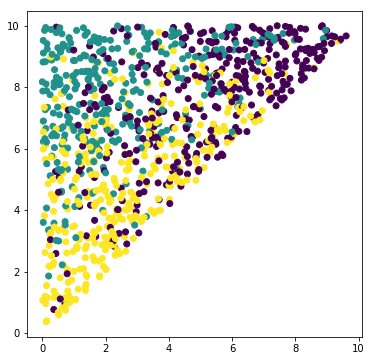

In [4]:
## Visualize Data Set
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(6,6))
plt.scatter([X[:, 0]], [X[:, 1]], c=y.T)
plt.show()

## Tests

In [5]:
k = 3
n = 2000
a1, a2, a3 = 0.3, 0.5, 0.75

X_train,y_train = generate_simplex_data(k,n)
y_train = y_train.astype(int)

X_test,y_test = generate_simplex_data(k,n)

In [13]:
def train_classifiers(X_train, y_train, X_test, y_test, a, reg_param=1,
                      kernel='linear', kernel_param=1, loss_function='logistic',
                      opt_type='SGD', opt_params={'learning_rate': 1}):
    results = {}
    y_quantiles = compute_alpha_quantile(X_test, a).astype(int)
    y_quantiles_in = compute_alpha_quantile(X_train, a).astype(int)
    
    
    start = timer()
    clf5 = QuantileIT(gamma=a, alpha=reg_param, kernel_type=kernel, opt_type=opt_type, opt_params=opt_params,
                              kernel_param=kernel_param, loss_function=loss_function)
    clf5.fit(X_train, y_train)
    preds_5 = clf5.predict(X_test)
    end = timer()
    
    abs_loss = weighted_absolute_loss(preds_5, y_test, a)
    zo_loss = metrics.zero_one_loss(preds_5, y_quantiles)
    print('Weighted Absolute Loss of QuantileIT, gamma=' + str(a) + ' %s' %
          abs_loss)
    print('0-1 Loss of QuantileIT, gamma=' + str(a) + ' %s' %
          zo_loss)
    
    preds_5_in = clf5.predict(X_train)
    abs_loss_in = weighted_absolute_loss(preds_5_in, y_train, a)
    zo_loss_in = metrics.zero_one_loss(preds_5_in, y_quantiles_in)
    print('In Sample Weighted Absolute Loss of QuantileIT, gamma=' + str(a) + ' %s' %
          abs_loss_in)
    print('In Sample 0-1 Loss of QuantileIT, gamma=' + str(a) + ' %s' %
          zo_loss_in)
    print('Time Elapsed: ' + str(end - start))
    
    results[clf5] = {'AbsLoss': abs_loss, 'ZoLoss': zo_loss, 'Preds': preds_5}
    
    print(' ')

    start = timer()
    clf6 = QuantileAT(gamma=a, alpha=reg_param, kernel_type=kernel, opt_type=opt_type, opt_params=opt_params,
                              kernel_param=kernel_param, loss_function=loss_function)
    clf6.fit(X_train, y_train)
    preds_6 = clf6.predict(X_test)
    end = timer()
    zo_loss = metrics.zero_one_loss(preds_6, y_quantiles)
    abs_loss = weighted_absolute_loss(preds_6, y_test, a)
    print('Weighted Absolute Loss of QuantileAT, gamma=' + str(a) + ' %s' %
          abs_loss)
    print('0-1 Loss of QuantileAT, gamma=' + str(a) + ' %s' %
          zo_loss)
    
    preds_6_in = clf6.predict(X_train)
    abs_loss_in = weighted_absolute_loss(preds_6_in, y_train, a)
    zo_loss_in = metrics.zero_one_loss(preds_6_in, y_quantiles_in)
    print('In Sample Weighted Absolute Loss of QuantileAT, gamma=' + str(a) + ' %s' %
          abs_loss_in)
    print('In Sample 0-1 Loss of QuantileAT, gamma=' + str(a) + ' %s' %
          zo_loss_in)
    print('Time Elapsed: ' + str(end - start))
    
    results[clf6] = {'AbsLoss': abs_loss, 'ZoLoss': zo_loss, 'Preds': preds_6}
    return results

In [25]:
reg = 1
kern = 'linear'
kern_param = 6
lf = 'logistic'

parms = {'learning_rate': 0.001, 'momentum_gamma': 0.9,
         'batch_size': 100, 'plot_file': 'test.png'}

results_scipy = train_classifiers(X_train, y_train, X_test, y_test, a1, reg_param=reg,
                            kernel=kern, kernel_param=kern_param, loss_function=lf,
                            opt_type='SciPy', opt_params=parms)

print(' ')
results = train_classifiers(X_train, y_train, X_test, y_test, a1, reg_param=reg,
                            kernel=kern, kernel_param=kern_param, loss_function=lf,
                            opt_type='SGD', opt_params=parms)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Weighted Absolute Loss of QuantileIT, gamma=0.3 0.24429999999999996
0-1 Loss of QuantileIT, gamma=0.3 0.3165
In Sample Weighted Absolute Loss of QuantileIT, gamma=0.3 0.24509999999999996
In Sample 0-1 Loss of QuantileIT, gamma=0.3 0.2895
Time Elapsed: 0.08650003100001413
 
Weighted Absolute Loss of QuantileAT, gamma=0.3 0.21864999999999998
0-1 Loss of QuantileAT, gamma=0.3 0.19099999999999995
In Sample Weighted Absolute Loss of QuantileAT, gamma=0.3 0.22114999999999999
In Sample 0-1 Loss of QuantileAT, gamma=0.3 0.20099999999999996
Time Elapsed: 0.057458295000003545
 
Weighted Absolute Loss of QuantileIT, gamma=0.3 0.25539999999999996
0-1 Loss of QuantileIT, gamma=0.3 0.405
In Sample Weighted Absolute Loss of QuantileIT, gamma=0.3 0.25759999999999994
In Sample 0-1 Loss of QuantileIT, gamma=0.3 0.39
Time Elapsed: 0.6072989380000422
 
Weighted Absolute Loss of QuantileAT, gamma=0.3 0.21789999999999998
0-1 Loss of QuantileAT, gamma=0.3 0.1885
In Sample Weighted Absolute Loss of QuantileAT

### Plot Decision Boundaries

QuantileIT(alpha=1, gamma=0.3, kernel_param=6, kernel_type='linear',
      loss_function='logistic', max_iter=1000,
      opt_params={'learning_rate': 0.001, 'momentum_gamma': 0.9, 'batch_size': 100, 'plot_file': 'test.png'},
      opt_type='SGD', verbose=0)
[-0.82101838 -0.48196231]
[-0.18134148 -0.14260652]
[-0.18134148 -0.14260652]
-0.14260652430942405


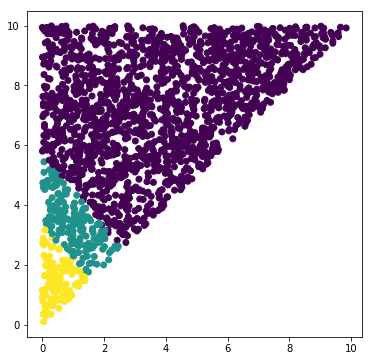

QuantileAT(alpha=1, gamma=0.3, kernel_param=6, kernel_type='linear',
      loss_function='logistic', max_iter=1000,
      opt_params={'learning_rate': 0.001, 'momentum_gamma': 0.9, 'batch_size': 100, 'plot_file': 'test.png'},
      opt_type='SGD', verbose=0)
[-2.60756389 -0.86408558]
[-0.26571035 -0.25968187]
[-0.26571035 -0.25968187]
-0.2596818728911208


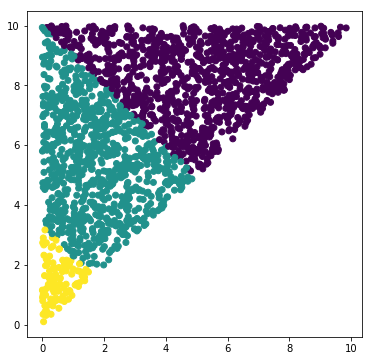

In [27]:
curr = results
for clf in curr.keys():
    print(clf)   
    print(clf.theta_)
    print(clf.coef_[0:5])
    print(clf.coef_[-5:])
    print(np.max(clf.coef_))
    fig=plt.figure(figsize=(6,6))
    plt.scatter([X_test[:, 0]], [X_test[:, 1]], c=[curr[clf]['Preds'].T])
    plt.show()

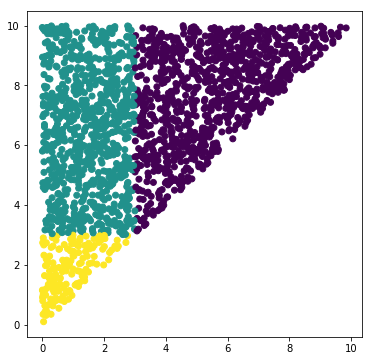

In [9]:
y_quantiles = compute_alpha_quantile(X_test, a1).astype(int)
fig=plt.figure(figsize=(6,6))
plt.scatter([X_test[:, 0]], [X_test[:, 1]], c=y_quantiles.T)

In [52]:
!python cross_validation.py 1000

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## Cross-Validation (Small Scale)

In [ ]:
k = 3
n = 1000
a1, a2, a3 = 0.3, 0.5, 0.75

X_train,y_train = generate_simplex_data(k,n)
y_train = y_train.astype(int)

X_test,y_test = generate_simplex_data(k,n)

In [ ]:
## Cross Validation for rbf and polynomial kernel
quantiles = [a1, a2, a3]

reg_vals = [10**(-2), 10**(-1)]
q_vals = [2, 3]
gamma_vals = [10**(-1), 10**0]

cv_results_file = open('cv_results.csv', "w")
cv_results_file.write('Fold,Quantile,Surrogate,Kernel_Type,Kernel_Parameter,Regularization,01_Loss\n')
kf = KFold(n_splits=2)
kf.get_n_splits(X_train)
fold = 0
for train_index, test_index in kf.split(X_train):
    fold += 1
    curr_X_train, curr_X_test = X_train[train_index], X_train[test_index]
    curr_y_train, curr_y_test = y_train[train_index], y_train[test_index]
    for a in quantiles:
        print('Fold ' + str(fold) + ' Quantile ' + str(a))
        a_test_quantiles = compute_alpha_quantile(curr_X_test, a)
        for reg in reg_vals:
            for q in q_vals:
                clf1 = QuantileIT(gamma=a, alpha=1., kernel_type='poly', kernel_param=q)
                clf1.fit(curr_X_train, curr_y_train)
                lossIT = metrics.zero_one_loss(clf1.predict(curr_X_test), a_test_quantiles , normalize=False)
                result_string = str(fold) + ',' + str(a) + ',' + 'IT' + ',' + 'poly' + ',' + str(q) + ',' + str(reg) + ',' + str(lossIT)
                cv_results_file.write(result_string + '\n')

                clf2 = QuantileAT(gamma=a, alpha=1., kernel_type='poly', kernel_param=q)
                clf2.fit(curr_X_train, curr_y_train)
                lossAT = metrics.zero_one_loss(clf2.predict(curr_X_test), a_test_quantiles , normalize=False)
                result_string = str(fold) + ',' + str(a) + ',' + 'AT' + ',' + 'poly' + ','+ str(q) + ',' + str(reg) + ',' + str(lossAT)
                cv_results_file.write(result_string + '\n')
                
            for g in gamma_vals:
                clf1 = QuantileIT(gamma=a, alpha=1., kernel_type='rbf', kernel_param=g)
                clf1.fit(curr_X_train, curr_y_train)
                lossIT = metrics.zero_one_loss(clf1.predict(curr_X_test), a_test_quantiles , normalize=False)
                result_string = str(fold) + ',' + str(a) + ',' + 'IT' + ',' + 'rbf' + ',' + str(g) + ',' + str(reg) + ',' + str(lossIT)
                cv_results_file.write(result_string + '\n')

                clf2 = QuantileAT(gamma=a, alpha=1., kernel_type='rbf', kernel_param=g)
                clf2.fit(curr_X_train, curr_y_train)
                lossAT = metrics.zero_one_loss(clf2.predict(curr_X_test), a_test_quantiles , normalize=False)
                result_string = str(fold) + ',' + str(a) + ',' + 'AT' + ',' + 'rbf' + ',' + str(g) + ',' + str(reg) + ',' + str(lossAT)
                cv_results_file.write(result_string + '\n')
    
cv_results_file.close()

In [ ]:
cv_results_from = pd.read_csv('cv_results.csv')
cv_results_from